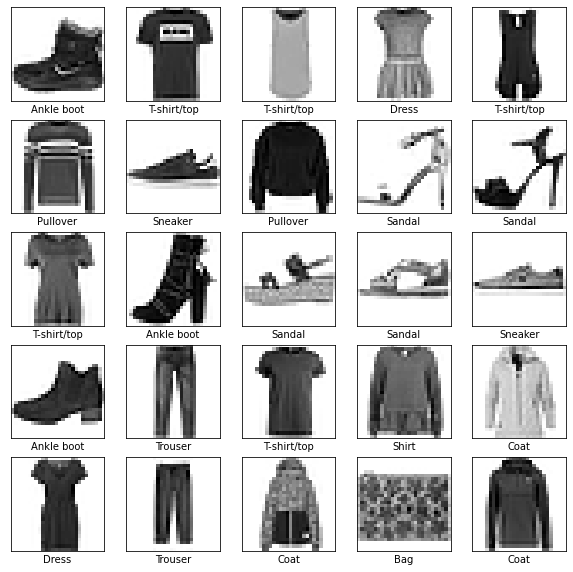

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4402 - accuracy: 0.5732
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8919 - accuracy: 0.7138
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7621 - accuracy: 0.7538
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6956 - accuracy: 0.7763
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6520 - accuracy: 0.7900
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6203 - accuracy: 0.7998
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5961 - accuracy: 0.8067
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5766 - accuracy: 0.8124
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5607 - accuracy: 0.8155
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.547

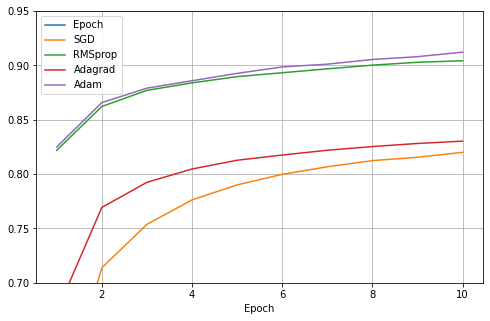

In [2]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adam

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize some samples.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

def model_init():
    model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
    ])
    return model

model_sgd = model_init()
model_adgrad = model_init()
model_rms = model_init()
model_adam = model_init()


# ==========================================================================
# (Do!) Import optimizers and initailize them!
sgd=SGD(learning_rate=0.001,momentum=0.0,decay=0.0,nesterov=False)
rmsprop=RMSprop(learning_rate=0.001,rho=0.9,decay=0.0,epsilon=None)
adagrad=Adagrad(learning_rate=0.001,epsilon=None,decay=0.0)
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
# ==========================================================================


# ==========================================================================
# (Do!) Specify the optimizer.
model_sgd.compile(optimizer=sgd,                   
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_rms.compile(optimizer=rmsprop,                 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_adgrad.compile(optimizer=adagrad,                 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_adam.compile(optimizer=adam,                   
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# ==========================================================================

print('=================================================================================================================')
hist0 = model_sgd.fit(train_images, train_labels, epochs=10)
print('=================================================================================================================')
hist1 = model_rms.fit(train_images, train_labels, epochs=10)
print('=================================================================================================================')
hist2 = model_adgrad.fit(train_images, train_labels, epochs=10)
print('=================================================================================================================')
hist3 = model_adam.fit(train_images, train_labels, epochs=10)
print('=================================================================================================================')

ep = np.arange(1,11,1)

acc0 = hist0.history['accuracy']
acc1 = hist1.history['accuracy']
acc2 = hist2.history['accuracy']
acc3 = hist3.history['accuracy']

list_of_tuples = list(zip(ep,acc0,acc1,acc2,acc3)) 

df = pd.DataFrame(list_of_tuples, columns = ['Epoch', 'SGD','RMSprop','Adagrad','Adam']) 

df.index = df['Epoch']
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(.7, .95) # set the vertical range to [0-1]
plt.savefig('optimizer.png',dpi=300,format='png')
plt.show()




Building a model with regularizer L2
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


422/422 [==============================] - 3s 6ms/step - loss: 1.6494 - accuracy: 0.7814 - val_loss: 0.9786 - val_accuracy: 0.8162
Epoch 2/30
422/422 [==============================] - 2s 6ms/step - loss: 0.9400 - accuracy: 0.8098 - val_loss: 0.9029 - val_accuracy: 0.8158
Epoch 3/30
422/422 [==============================] - 2s 6ms/step - loss: 0.8959 - accuracy: 0.8113 - val_loss: 0.8776 - val_accuracy: 0.8178
Epoch 4/30
422/422 [==============================] - 2s 6ms/step - loss: 0.8820 - accuracy: 0.8131 - val_loss: 0.9089 - val_accuracy: 0.7998
Epoch 5/30
422/422 [==============================] - 2s 6ms/step - loss: 0.8771 - accuracy: 0.8121 - val_loss: 0.8585 - val_accuracy: 0.8143
Epoch 6/30
422/422 [==============================] - 2s 6ms/step - loss: 0.8741 - accuracy: 0.8129 - val_loss: 0.8620 - val_accuracy: 0.8165
Epoch 7/30
422/422 [==============================] - 3s 6ms/step - loss: 0.8665 - accuracy: 0.8133 - val_loss: 0.8539 - val_accuracy: 0.8147
Epoch 8/30
422/42

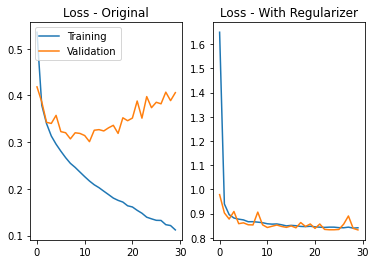

Result saved into regularizer.png


In [4]:
#coding=utf-8
''' Import theano and numpy '''
from __future__ import print_function
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
np.random.seed(1337)

''' Read input files '''
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

''' set the size of mini-batch and number of epochs'''
batch_size = 128
epochs = 30

''' Import keras to build a DL model '''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# ==========================================================================
from tensorflow.keras.regularizers import l2

# ==========================================================================

# ==========================================================================
# (Do!) Apply kernel_regularizer.
print('Building a model with regularizer L2')
model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(28, 28)))
model_l2.add(Dense(128, input_dim=784,kernel_regularizer=l2(0.01)))		
model_l2.add(Activation('relu'))
model_l2.add(Dense(256,kernel_regularizer=l2(0.01)))					
model_l2.add(Activation('relu'))
model_l2.add(Dense(10,kernel_regularizer=l2(0.01)))						
model_l2.add(Activation('softmax'))
# ==========================================================================



''' Setting optimizer as Adam '''
model_l2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              	optimizer='Adam',
              	metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_l2 = model_l2.fit(train_images, train_labels,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)
loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('accuracy')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_accuracy')

# reference
print('Building a model without regularizer L2')
model = Sequential()
model.add(Flatten(input_shape=(28, 28))),
model.add(Dense(128, input_dim=200))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

''' Setting optimizer as Adam '''
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model.fit(train_images, train_labels,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)

''' Access the performance on validation data '''
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('accuracy')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_accuracy')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss - Original')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(loss_l2)), loss_l2,label='Training')
plt.plot(range(len(val_loss_l2)), val_loss_l2,label='Validation')
plt.title('Loss - With Regularizer')
plt.savefig('regularizer.png',dpi=300,format='png')
plt.show()
plt.close()
print('Result saved into regularizer.png')

Building current best model with EarlyStopping
Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 0.5367 - accuracy: 0.8121 - val_loss: 0.4135 - val_accuracy: 0.8505
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.3825 - accuracy: 0.8624 - val_loss: 0.3948 - val_accuracy: 0.8587
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.3399 - accuracy: 0.8762 - val_loss: 0.3518 - val_accuracy: 0.8743
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.3142 - accuracy: 0.8853 - val_loss: 0.3422 - val_accuracy: 0.8750
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2946 - accuracy: 0.8911 - val_loss: 0.3253 - val_accuracy: 0.8803
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2785 - accuracy: 0.8981 - val_loss: 0.3310 - val_accuracy: 0.8807
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2638 - accuracy: 0.9025 -

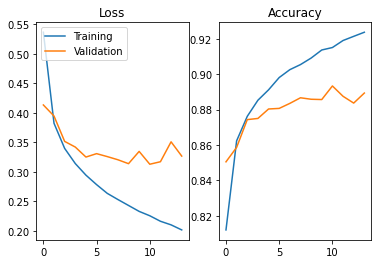

Result saved into earlystopping.png


In [7]:
#coding=utf-8
''' Import theano and numpy '''
from __future__ import print_function
import numpy as np
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
np.random.seed(1337)

from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

''' EarlyStopping '''

# ==========================================================================
# (Do!) 從 tensorflow.keras.callbacks 中 import EarlyStopping 
# 		並設定 monitor 與 patience
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3)
# ==========================================================================
''' set the size of mini-batch and number of epochs'''
batch_size = 128
epochs = 30

''' Import keras to build a DL model '''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

print('Building current best model with EarlyStopping')
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, input_dim=200))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

''' Setting optimizer as Adam '''
model.compile(loss= 'sparse_categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
# ==========================================================================
# (Do!) 把先前設定的 EarlyStopping 加入
history = model.fit(train_images, train_labels,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
                    		validation_split=0.1,
							callbacks=[early_stopping], # callbacks 加入earlystop
							)  
# ==========================================================================
loss = history.history.get('loss')
acc = history.history.get('accuracy')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_accuracy')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss,label='Training')
plt.plot(range(len(val_loss)), val_loss,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc)), acc,label='Training')
plt.plot(range(len(val_acc)), val_acc,label='Validation')
plt.title('Accuracy')
plt.savefig('earlystopping.png',dpi=300,format='png')
plt.show()
print('Result saved into earlystopping.png')